<div style="text-align: right; font-weight: bold;">
東京工科大学コンピュータサイエンス学部<br>
福西広晃
</div>

----

<span style="font-size: 250%; color: black;">4：Pythonによるデータ可視化</span>

----

# matplotlibについて
## 概要
- `matplotlib`はグラフ作成のための代表的なライブラリ
- Excelよりも自由度の高く美しいグラフを書くことできる

## matplotlib.pyplotのインポート
- matplotlibを利用する場合は、matplotlib.pyplotをインポートする。その際、`plt`という名前を付けて使用するのが慣習である<br>
  `import matplotlib.pyplot as plt`
- `matplotlib inline`も同時に記述

## matplotlibにおけるグラフの構造
- matplotlibのグラフは、FigureオブジェクトとAxesオブジェクトによって構成される
  - Figureオブジェクト：グラフを描く領域を表すオブジェクト(=描画領域)
  - Axesオブジェクト：グラフ自体を表すオブジェクト
- 下図のようにFigureオブジェクトにAxesオブジェクトを配置し、それぞれを修飾することでグラフを作成する。AxesオブジェクトはFigureオブジェクトに複数配置することも可能。
<br><br>
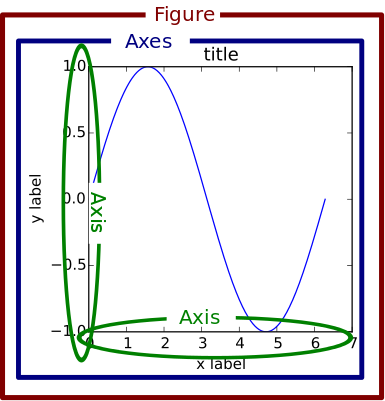

## グラフの書き方の２つの方法
- `pyplotインターフェース`による方法 (1つのグラフを簡易に作成する方法)
  - Figureオブジェクト、Axesオブジェクトを意識せずにメソッド(作図機能)を用いてグラフを作成
<br><br>  
- `オブジェクト指向インターフェース`による方法 (複数のグラフを並べて描くなど凝った方法)
  - Figureオブジェクト、Axesオブジェクトを段階的に作成して、グラフを作成
  - これにより、Figureオブジェクトの中に、複数のAxesオブジェクトを作成すること（つまり複数グラフを並べる）も可能になる
<br><br>  
- **本講義では `pyplotインターフェース`のみを扱う**  

## 準備
- matplotlibではグラフに日本語が使用できない
- 日本語を使えるようにするためには`japanize-matplotlib`をインストールして、グラフ作成の際にインポートする必要がある
- インストール方法 (Google Colaboraotyでは初期インストールされていないのでインストールが必要)<br>
    `pip install japanize-matplotlib`

- インストールしていない場合は、以下のコメントアウトを外して実行

In [ ]:
# pip install japanize-matplotlib

----

**Googleドライブにアクセス**

In [ ]:
# 以下のコメントアウトを外してください
#from google.colab import drive
#drive.mount('/content/drive')

----

# 散布図の作成
- 散布図の作成を通して`matplotlib`の使い方の基本を学習する

## グラフ作成用のデータの読み込み
- データ：iris（あやめ）データ
    - sepal_length: がくの長さ
    - sepal_width : がくの幅
    - petal_length: 花弁の長さ
    - petal_width : 花弁の幅
    - species     : 品種 (setosa,versicolor,virginica)
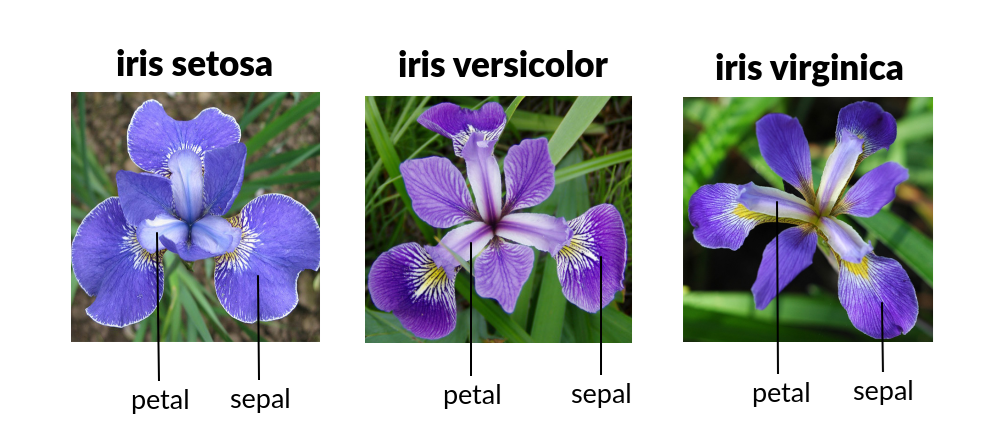

データの可視化に用いるデータは`Pandas`に格納します（Pandasは前回に学習）

In [ ]:
import pandas as pd

# ファイルの指定
xlsxfile  = "dataset/iris.xlsx" # dataset内のExcelファイル

# Googleドライブの場合は次のコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第04回_プログラム/dataset/iris.xlsx"

# データの読み込み
df_iris = pd.read_excel(xlsxfile, sheet_name='iris')

# データの表示
display(df_iris)

## 品種ごとにデータ抽出

In [ ]:
TrueFalse = df_iris["species"] == "setosa"         # setosaの行の真偽を判定
df_setosa = df_iris[TrueFalse]                     # True（真）の行を抽出
display(df_setosa.head(3))                         # 先頭3行を表示

TrueFalse     = df_iris["species"] == "versicolor" # versicolorの行の真偽を判定
df_versicolor = df_iris[TrueFalse]                 # True（真）の行を抽出
display(df_versicolor.head(3))                     # 先頭3行を表示

TrueFalse    = df_iris["species"] == "virginica"  # virginicaの行の真偽を判定
df_virginica = df_iris[TrueFalse]                 # True（真）の行を抽出
display(df_virginica.head(3))                     # 先頭3行を表示

## 装飾なしのグラフの生成
- 散布図は2次元データ(pandasの2列)が入力となる
- 散布図は`scatter`メソッドを利用
```Python
plt.scatter(x,y)
```

**品種`setosa`の`がくの長さ`(sepal_length)と`がくの幅`(sepal_width)の関係を表す散布図を作成**

In [ ]:
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline

# 使用する列を抽出
x1 = df_setosa["sepal_length"] # がくの長さ
y1 = df_setosa["sepal_width"]  # がくの幅  

# グラフ作成
plt.scatter(x1,y1) 

# グラフ表示
plt.show()       

## 練習
品種`setosa`の花弁の長さ(petal_length)と幅(petal_width)の関係を表す散布図を作成してみよう。花弁の長さは`a1`、花弁の幅は`b1`に代入するものとする。

----
**質問**<br>
上記のグラフはレポートに載せるグラフとして適切ではありません。上記のグラフを見て足りない要素を挙げてみよう。

----

## タイトルや軸ラベルを追加
- タイトルの追加: `plt.title("タイトル名", fontsize=値)`
- x軸のラベルの追加: `plt.xlabel("タイトル名", fontsize=値)`
- y軸のラベルの追加: `plt.ylabel("タイトル名", fontsize=値)`
<br><br>
- **レポート用にグラフを作成する場合は、グラフタイトル、軸のラベルを付けることがお作法です**

In [ ]:
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline              

# グラフ作成
plt.scatter(x1,y1)

# 追加オプション
plt.title("がくの長さと幅の関係", fontsize=20) # タイトルを追加
plt.xlabel("がくの長さ(cm)", fontsize=15)      # x軸のラベルを追加
plt.ylabel("がくの幅(cm)", fontsize=15)        # y軸のラベルを追加

# グラフ表示
plt.show()

## 練習
前回の練習で作成した`a1`と`b1`の散布図に`タイトル`、`xラベル`, `yラベル`を付けてみよう。タイトルは`花弁の長さと幅の関係`、xラベルは`花弁の長さ(cm)`、yラベルは`花弁の幅(cm)`とする。

## 補助線の追加
- 補助線の追加: `plt.grid()`
- 横の補助線のみでよい場合は引数に`axis="y"`を追加:  `plt.grid(axis="y")`
- 縦の補助線のみでよい場合は引数に`axis="x"`を追加:  `plt.grid(axis="x")`
<br><br>
- **レポート用にグラフを作成する場合は、補助線を付けると値が読み取りやすくなります**

In [ ]:
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline              

# グラフ作成
plt.scatter(x1,y1)

# 追加オプション
plt.title("がくの長さと幅の関係", fontsize=20) # タイトルを追加（フォントサイズ指定）
plt.xlabel("がくの長さ(cm)", fontsize=15) # x軸のラベルを追加（フォントサイズ指定）
plt.ylabel("がくの幅(cm)",  fontsize=15)  # y軸のラベルを追加（フォントサイズ指定）
plt.grid() # 補助線を追加

# グラフ表示
plt.show()

## 練習
前回の練習で作成した`a1`と`b1`の散布図に補助線を追加してみよう。

## 複数のデータの重ね合わせ
- データごとに`scatter`メソッドを利用
- 凡例に表示するためにラベルを設定
```
plt.scatter(x,y,label="ラベル名")
```
- `plt.scatter(x,y,label="ラベル名")`を続けて記述すると複数のデータが重なる
- 凡例を追加：`plt.legend(fontsize=値, loc="位置")`
  - 位置の選択肢: `best`, `upper right`, `upper left`, `lower left`, `lower right`, `right`, `center left`, `center right`, `lower center`, `upper center`, `center`
  - `best`は適切な位置を自動で選んでくれる
<br><br>
- **レポート用にグラフを作成する場合、複数のデータが重なっていれば凡例が必要です**

In [ ]:
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline      

# 品種1
x1 = df_setosa["sepal_length"] # がくの長さ
y1 = df_setosa["sepal_width"]  # がくの幅  

# 品種2
x2 = df_versicolor["sepal_length"] # がくの長さ
y2 = df_versicolor["sepal_width"]  # がくの幅 

# 品種3
x3 = df_virginica["sepal_length"] # がくの長さ
y3 = df_virginica["sepal_width"]  # がくの幅 


# グラフ作成
plt.scatter(x1,y1, label="setosa")     # 1つ目のデータに凡例用ラベルを追加　 
plt.scatter(x2,y2, label="versicolor") # 2つ目のデータに凡例用ラベルを追加　 
plt.scatter(x3,y3, label="virginica")  # 3つ目のデータに凡例用ラベルを追加

# 追加オプション
plt.title("がくの長さと幅の関係", fontsize=20) # タイトルを追加（フォントサイズ指定）
plt.xlabel("がくの長さ(cm)", fontsize=15) # x軸のラベルを追加（フォントサイズ指定）
plt.ylabel("がくの幅(cm)",  fontsize=15)  # y軸のラベルを追加（フォントサイズ指定）
plt.grid() # 補助線を追加
plt.legend(fontsize=15, loc="best") # 凡例を追加

# グラフ表示
plt.show()

## 練習
前の練習で作成したa1とb1の散布図に、versicolorとvirginicaのデータを重ねてみよう。versicolorの花弁の長さをa2、幅をb2、virginicaの花弁の長さをa3、幅をb3の変数に代入してグラフ作成に使用するものとする。凡例には品種名を付けるものとし、フォントサイズは`15`ポイント、凡例の位置は自動で最適な位置に置くものとする。

----
**質問**
上記のグラフを見てがくの長さと幅の関係性が強い品種はどれでしょうか

----

## 相関係数の計算
- 2つの項目の関係性の強さを定量的に表す指標として`相関係数`がある
- 相関係数を計算するライブラリ: scipy.stats.pearsonrのインポート
```Python
from scipy.stats import pearsonr
```
- データxとデータyの相関係数（r）の計算
```Python
相関係数, p値 = pearsonr(x, y)
```
- 相関係数（r）の意味付け
  -  0.7 < r < 1.0 強い正の相関
  -  0.4 < r < 0.7 適度な正の相関
  -  0.2 < r < 0.4 弱い正の相関
  - -0.2 < r < 0.2 相関なし
  - -0.4 < r < -0.2 弱い負の相関
  - -0.7 < r < -0.4 適度な負の相関
  - -1.0 < r < -0.7 強い負の相関

In [ ]:
from scipy.stats import pearsonr

# 相関係数の計算
corr1, p1 = pearsonr(x1, y1) # setosa
corr2, p2 = pearsonr(x2, y2) # versicolor
corr3, p3 = pearsonr(x3, y3) # virginica

# 相関係数の表示
print("setosa:", corr1)
print("versicolor:", corr2)
print("virginica:", corr3)

上記の相関係数を比較すると、がくの長さと幅の関係が最も強い品種はsetosa。つまり、がくの長さが長いと幅も広がる。

## 練習
前回の練習で作成した散布図に関して、各品種の花弁の長さと幅の関係性の強さを表す相関係数を計算してみよう。計算結果から、花弁の長さと幅の関係性が最も強い品種を挙げてみよう。

## グラフのサイズの変更
```Python
plt.figure(figsize=(横のインチ, 縦のインチ))
```
グラフ作成（`plt.scatter(x,y）`）前に記述

In [ ]:
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline      

plt.figure(figsize=(5, 5)) # グラフサイズの変更

# グラフ作成
plt.scatter(x1,y1, label="setosa") # 1つ目のデータ　 
plt.scatter(x2,y2, label="versicolor") # 2つ目のデータ　 
plt.scatter(x3,y3, label="virginica") # 3つ目のデータ

# 追加オプション
plt.title("がくの長さと幅の関係", fontsize=20) # タイトルを追加（フォントサイズ指定）
plt.xlabel("がくの長さ(cm)", fontsize=15) # x軸のラベルを追加（フォントサイズ指定）
plt.ylabel("がくの幅(cm)",  fontsize=15)  # y軸のラベルを追加（フォントサイズ指定）
plt.grid() # 補助線を追加
plt.legend(fontsize=15, loc="best") # 凡例を追加

# グラフ表示
plt.show()

## 練習
前回の練習で作成した散布図のグラフサイズを変更してみよう。横10インチ、縦5インチとする。

## グラフ画像を保存
- 保存形式の種類: `emf`,`eps`, `jpeg`, `jpg`, `pdf`, `png`, `ps`, `raw`, `rgba`, `svg`, `svgz`, `tif`, `tiff`
  - `png`形式で保存することが多い
```Python
plt.savefig("画像ファイル名.png", bbox_inches="tight")
```
  - このプログラムファイルと同じフォルダに保存される
  - 画像中にグラフがぴったり納まるように`bbox_inches="tight"`を入れておく

In [ ]:
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline   

plt.figure(figsize=(8, 6)) # グラフサイズの変更

# グラフ作成
plt.scatter(x1,y1, label="setosa") # 1つ目のデータ　 
plt.scatter(x2,y2, label="versicolor") # 2つ目のデータ　 
plt.scatter(x3,y3, label="virginica") # 3つ目のデータ

# 追加オプション
plt.title("がくの長さと幅の関係", fontsize=20) # タイトルを追加（フォントサイズ指定）
plt.xlabel("がくの長さ(cm)", fontsize=15) # x軸のラベルを追加（フォントサイズ指定）
plt.ylabel("がくの幅(cm)",  fontsize=15)  # y軸のラベルを追加（フォントサイズ指定）
plt.grid() # 補助線を追加
plt.legend(fontsize=15) # 凡例を追加

# 出力設定
pngfile  = "グラフ_散布図_がくの長さと幅の関係.png" # グラフ画像のファイル名

# Googleドライブの場合は次のコメントアウトを外す
# pngfile = "drive/My Drive/Colab Notebooks/第04回_プログラム/グラフ_散布図_がくの長さと幅の関係.png"

plt.savefig(pngfile, bbox_inches='tight') # 画像の保存

# グラフ表示
plt.show()

## 練習
前回の練習で作成した散布図のグラフサイズの画像を保存してみよう。画像の保存形式は`png`とし、ファイル名は`グラフ_散布図_花弁の長さと幅の関係.png`とする。

----

# 時系列グラフ作成

## データ読み込み
- 時系列データをpandasに読み込む際は、インデックスを日時にすると扱いやすい
```Python
pd.read_excel(file, sheet_name='シート名', parse_dates=["日時の列名"], index_col="日時の列名")
```
  - parse_dates: 対象の列を日時として扱うための型変換
  - index_col: インデックスとして扱う列名を指定
<br><br>
- 日経平均データ
  - Open: 始値
  - High: 高値
  - Low: 安値
  - Close: 終値
  - Volune: 出来高
  - day_name: 曜日

In [ ]:
import pandas as pd

# ファイルの指定
xlsxfile  = "dataset/N225.xlsx"   # dataset内のExcelファイル

# Googleドライブの場合は次のコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第04回_プログラム/dataset/N225.xlsx"

# データの読み込み
df_N225 = pd.read_excel(xlsxfile, sheet_name='N225', parse_dates=['date'], index_col="date")

# データの表示
display(df_N225)

## グラフ作成

In [ ]:
import matplotlib.pyplot as plt # グラフ作成
import japanize_matplotlib      # 日本語対応
%matplotlib inline

# x軸,y軸に対応するデータを取得
date   = df_N225.index    # 行名の日時を取得
price  = df_N225['Close'] # 終値を取得

# グラフ作成前に設定するオプション
plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル
plt.plot(date, price, label="日経平均") 

# 追加オプション
plt.title("日経平均",fontsize=15)         # グラフタイトル
plt.ylabel('株価(円)',fontsize=15)        # y軸ラベル
plt.grid()                                # 補助線追加

# 出力設定
pngfile  = "グラフ_日経平均.png" # グラフ画像のファイル名

# Googleドライブの場合は次のコメントアウトを外す
# pngfile = "drive/My Drive/Colab Notebooks/第04回_プログラム/グラフ_日経平均.png"

plt.savefig(pngfile, bbox_inches='tight') # 画像の保存

# グラフ表示
plt.show()

## 特定の期間の切り出し
```Python
データフレーム名[開始日:終了日]
```

In [ ]:
# 特定の時間範囲を切り出す
start  = "2019-08-01"   # 開始日
end    = "2019-08-31"   # 終了日

# データの切り出し
df_subset   = df_N225[start:end]

# 切り出したデータを表示
display(df_subset)

## グラフ作成（特定の期間）

In [ ]:
import matplotlib.pyplot as plt # グラフ作成
import japanize_matplotlib      # 日本語対応
%matplotlib inline

# x軸,y軸に対応するデータを取得
date   = df_subset.index    # 行名の日時を取得
price  = df_subset['Close'] # 終値を取得

# グラフ作成前に設定するオプション
plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル
plt.plot(date, price, label="日経平均_201908") 

# 追加オプション
plt.title("日経平均_201908",fontsize=15)  # グラフタイトル
plt.ylabel('株価(円)',fontsize=15)        # y軸ラベル
plt.grid()                                # 補助線追加

# 出力設定
pngfile  = "グラフ_日経平均_201908.png" # グラフ画像のファイル名

# Googleドライブの場合は次のコメントアウトを外す
# pngfile = "drive/My Drive/Colab Notebooks/第04回_プログラム/グラフ_日経平均_201908.png"

plt.savefig(pngfile, bbox_inches='tight') # 画像の保存

# グラフ表示
plt.show()

## 練習

(1) 上記の`df_N225`のデータフレームを使って、第4四半期（2019/10/01-2019/12/31）の出来高（volume）をグラフにしてみよう
- 2019/10/01-2019/12/31のデータを切り出して`df_subset1`のデータフレームに代入
- インデックスの日時を`data`変数に、`volume`列を`volume`変数に代入
- 図サイズは16インチ×4インチ
- 時系列グラフ作成
  - グラフタイトル： 日経平均(出来高)_2019_4Q
  - xラベル：なし
  - yラベル: 株価(円)
  - フォントサイズ：15
  - 補助線：あり
- グラフ画像を出力
  - 画像ファイル名：グラフ_日経平均(出来高)_2019_4Q.png

----

# （オプション）様々なグラフのサンプル
- グラフ作成で使用頻度が高い`ヒストグラム`、`棒グラフ`、`円グラフ`、`箱ひげ図`の作成例を示す
- レポートの挿入するグラフとして最低限必要なオプションを付けて記載している

## ヒストグラム
```Python
plt.bar([横軸データ(時系列など)], [縦軸データ(値)])
```    

In [ ]:
import matplotlib.pyplot as plt  # グラフ作成のためにインポート
import japanize_matplotlib       # グラフで日本語を使用するためにインポート
%matplotlib inline

# データ準備
data = [10, 20, 20, 30, 30, 30, 40, 40, 40, 40, 50, 50, 50, 50, 50]  

# 階級の設定
bins = [0, 10, 20, 30, 40, 50, 60, 70] 

# グラフ作成
plt.hist(data, bins=bins, edgecolor='black')  # ヒストグラムを作成

# 追加オプション
plt.title("タイトル", fontsize=20)  # タイトルを追加（フォントサイズ指定）
plt.xlabel("xラベル", fontsize=15)  # x軸のラベルを追加（フォントサイズ指定）
plt.ylabel("頻度", fontsize=15)     # y軸のラベルを追加（フォントサイズ指定）
plt.grid(axis="y")                  # y軸にグリッドを表示

# グラフ表示
plt.show()

## 棒グラフ
```Python
plt.bar([カテゴリ], [データ])
```

In [ ]:
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline  

# データ準備
x = ['A','B','C','D','E'] # x軸はカテゴリ
y = [10, 20, 30, 20, 10]  # y軸は値

# グラフ作成
plt.bar(x, y)

# 追加オプション
plt.title("タイトル", fontsize=20) # タイトルを追加（フォントサイズ指定）
plt.xlabel("xラベル", fontsize=15) # x軸のラベルを追加（フォントサイズ指定）
plt.ylabel("yラベル", fontsize=15)  # y軸のラベルを追加（フォントサイズ指定）
plt.grid(axis="y")

# グラフ表示
plt.show()

## 円グラフ
```Python
plt.pie([データ], labels=[ラベル])
```
- 詳細設定
  - 時計回りに設定: `counterclock=False`
  - 90度（12時）からスタート: `startangle=90`
  - 円内にパーセント表示を使い: `autopct="%.1f%%"`

In [ ]:
# 作図に必要なライブラリのインポート
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline  

# データ準備
x     = [15, 24, 45, 55] # 頻度
label = ['AAA', 'BBB', 'CCC', 'DDD'] # ラベル

# グラフ作成
plt.pie(x, labels=label, counterclock=False, startangle=90,  autopct="%.1f%%")

# 追加オプション
plt.title("タイトル", fontsize=20) # タイトルを追加（フォントサイズ指定）

# グラフ表示
plt.show()

## 箱ひげ図
```Python
plt.boxplot([データ], labels=[ラベル])
```

In [ ]:
# 作図に必要なライブラリのインポート
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline  

# データ準備
x = [1, 4, 9,16,25, 28, 30, 40, 42, 47]   # 値1
y = [1, 2, 3, 4, 5,  9, 13, 16, 20, 22]   # 値2
z = [2, 5, 8,10,17, 18, 20, 25, 33, 39]   # 値3
label = ["x", "y", "z"] # ラベル

# グラフ作成
plt.boxplot([x, y, z], labels=label)

# 追加オプション
plt.title("タイトル", fontsize=20) # タイトルを追加（フォントサイズ指定）
plt.xlabel("xラベル", fontsize=15) # x軸のラベルを追加（フォントサイズ指定）
plt.ylabel("yラベル", fontsize=15)  # y軸のラベルを追加（フォントサイズ指定）
plt.grid(axis="y")

# グラフ表示
plt.show()

## 練習

上記の折れ線グラフ、棒グラフ、円グラフ、箱ひげ図のいずれかを作図してみよう。データは自由に作成してよいものとする。

----